In [12]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
train_grocery_df, test_grocery_df, train_counts_df, test_counts_df, train_household_ids, test_household_ids = pickle.load(open('/home/adrien/Projects/MNMM/run_with_gamma/data.p', 'rb'))

In [15]:
best_loss, test_log_likelihood, test_bic, best_alpha, best_beta, best_gamma = pickle.load(open('/home/adrien/Projects/MNMM/run_with_gamma/best_params_30.p', 'rb'))

In [16]:
test_log_likelihood

-820301.6597853068

In [17]:
test_bic

1671014.8090455926

## Visualize cluster category probabilities

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

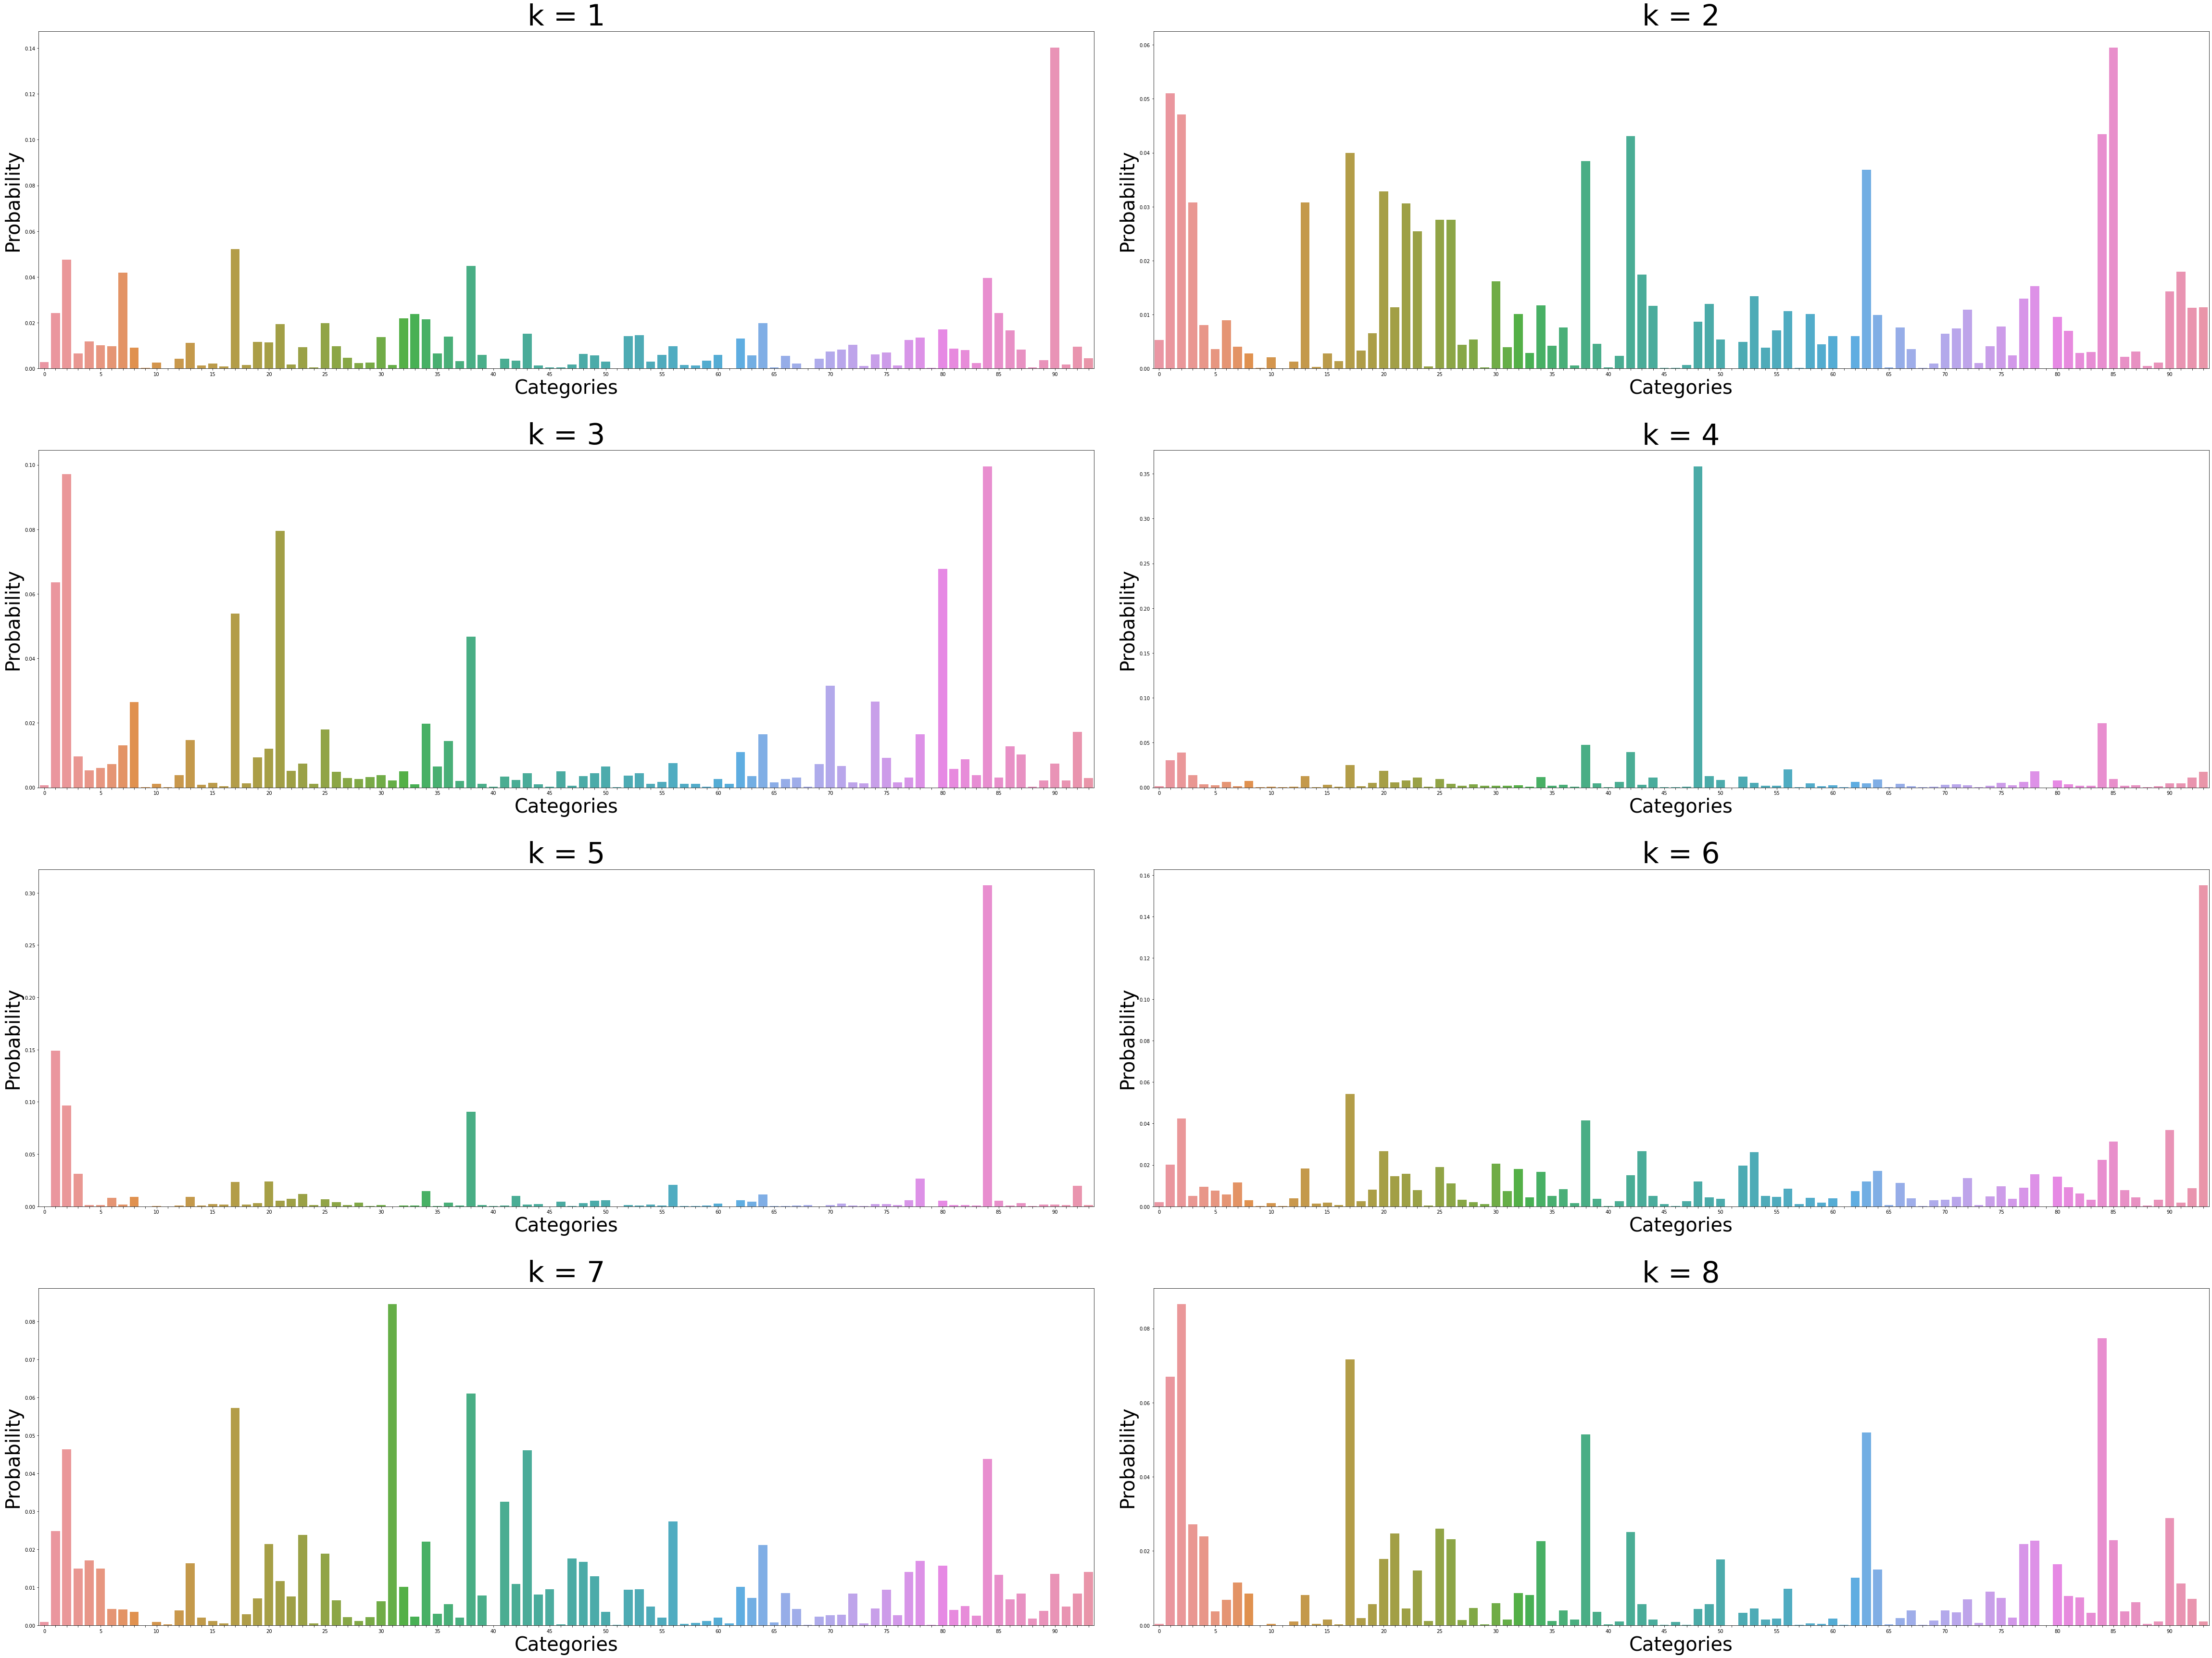

In [16]:
def hide_tick_labels(every_nth, ax):
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

K, C = best_beta.shape
K = 8
fig, axes = plt.subplots(nrows=(K // 2), ncols=2, figsize=(64,48))
k = 0
i = 0
while k < K:
    sns.barplot(list(range(C)), best_beta[k], ax=axes[i][0])
    hide_tick_labels(5, axes[i][0])
    axes[i][0].set_title('k = %i' % (k+1), size=60)
    axes[i][0].set_xlabel('Categories', size=40)
    axes[i][0].set_ylabel('Probability', size=40)
    k += 1
    
    sns.barplot(list(range(C)), best_beta[k], ax=axes[i][1])
    hide_tick_labels(5, axes[i][1])
    axes[i][1].set_title('k = %i' % (k+1), size=60)
    axes[i][1].set_xlabel('Categories', size=40)
    axes[i][1].set_ylabel('Probability', size=40)

    k += 1
    i += 1

fig.tight_layout(h_pad=5, w_pad=5)

## Visualize cluster distances

In [17]:
from sklearn.metrics.pairwise import manhattan_distances

beta_distances = manhattan_distances(best_beta)

In [19]:
beta_distances.shape

(30, 30)

In [20]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, dissimilarity='precomputed')
beta_distances_transformed = embedding.fit_transform(beta_distances)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


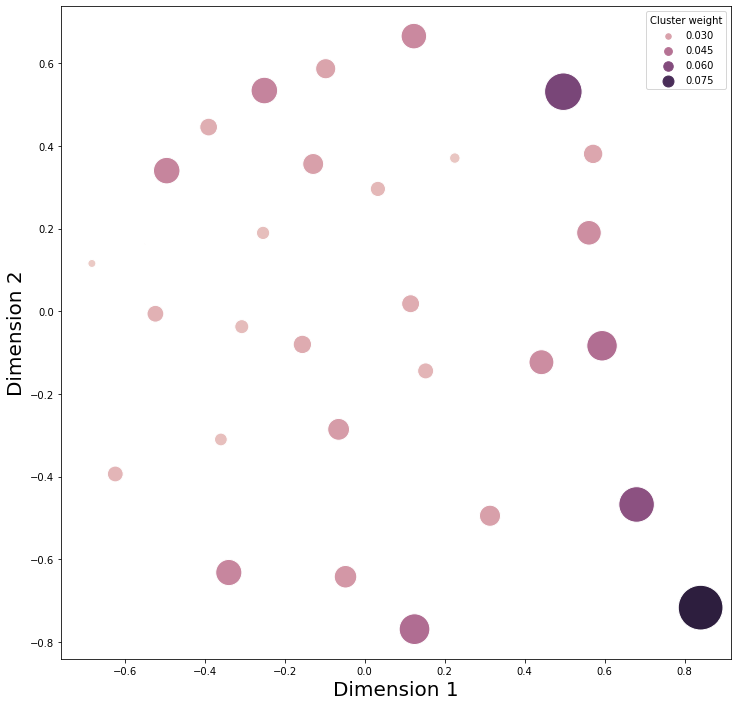

In [27]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(beta_distances_transformed[:, 0], 
                     beta_distances_transformed[:, 1],
                     size=best_alpha,
                     hue=best_alpha,
                     sizes=(1, 2000))
ax.set_xlabel('Dimension 1', size=20)
ax.set_ylabel('Dimension 2', size=20)

# Plot legend.
lgnd = ax.legend(title='Cluster weight')
for i, handle in enumerate(lgnd.legendHandles):
    handle._sizes = [(i+1) * 30]

## Describe clusters by high lift items

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

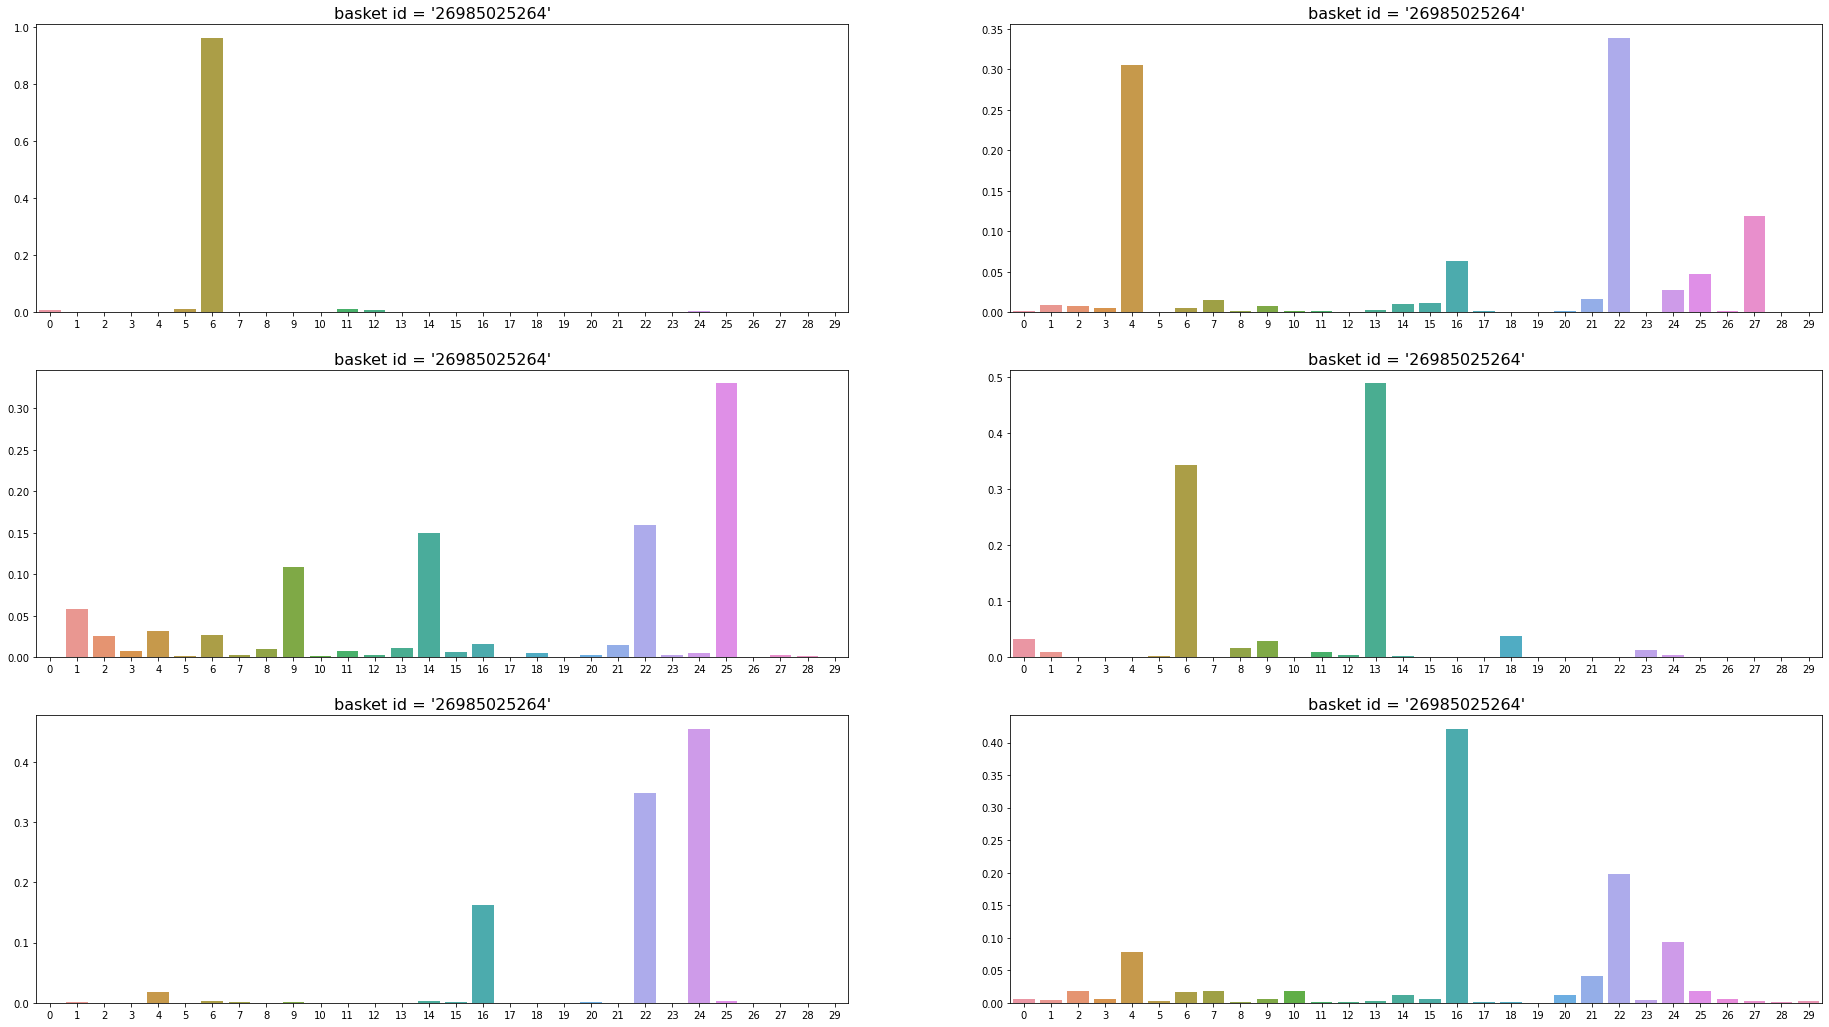

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(32,18))
for i in range(6):
    sns.barplot(list(range(best_gamma.shape[1])), best_gamma[i], ax=axes[(i//2)][i%2])
    axes[(i//2)][i%2].set_title("basket id = '%s'" % train_grocery_df.BASKET_ID[:6][i], size=16)

__Compute global product purchase probabilities__

In [5]:
product_counts = train_grocery_df.groupby('PRODUCT_ID')['QUANTITY'].sum()
product_purchase_prob = product_counts / product_counts.sum()

No handles with labels found to put in legend.


Text(0.5, 0, 'Product probability')

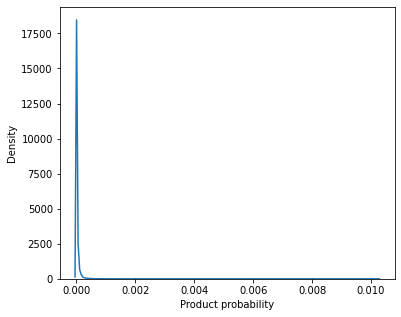

In [6]:
fig, ax = plt.subplots(figsize=(6,5))
sns.kdeplot(product_purchase_prob, ax=ax)
ax.legend().remove()
ax.set_xlabel('Product probability')

In [122]:
global_probs_df = pd.DataFrame(data={'Product probability': product_purchase_prob}).sort_values('Product probability', ascending=False)
import dataframe_image as dfi
dfi.export(global_probs_df.head(), "train_grocery_df_head.png")

In [7]:
high_freq_items_prob = product_purchase_prob[product_purchase_prob > 0.0001]
high_freq_items_prob_df = pd.DataFrame(data={'Total purchase prob': high_freq_items_prob})
high_freq_items_prob_df.sort_values('Total purchase prob', ascending=False)

,Total purchase prob
PRODUCT_ID,
995242,0.010237
1029743,0.007635
1133018,0.005806
981760,0.005225
1106523,0.005187
...,...
9553382,0.000101
903609,0.000101
943858,0.000101


No handles with labels found to put in legend.


Text(0.5, 0, 'Product probability')

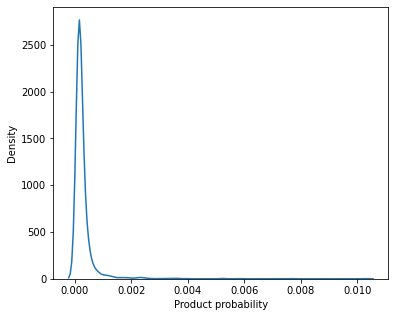

In [8]:
fig, ax = plt.subplots(figsize=(6,5))
sns.kdeplot(high_freq_items_prob_df['Total purchase prob'], ax=ax)
ax.legend().remove()
ax.set_xlabel('Product probability')

In [9]:
total_cluster_weights = best_gamma.sum(axis=0)

products_filepath = '/home/adrien/Téléchargements/dunnhumby/product.csv'
products_df = pd.read_csv(products_filepath)
products_df.set_index('PRODUCT_ID', inplace=True)

cluster_weights_by_basket_id = {}
for i, (individual_id, basket_id) in enumerate(train_counts_df.index):
    cluster_weights_by_basket_id[basket_id] = best_gamma[i]

def product_prob_for_component(g, k):
    total_product_cluster_weight = 0
    for basket_id in g['BASKET_ID']:
        total_product_cluster_weight += cluster_weights_by_basket_id[basket_id][k]
    return total_product_cluster_weight / total_cluster_weights[k]

def get_high_lift_frequent_items(k):
    product_cluster_purchase_prob = train_grocery_df.groupby('PRODUCT_ID').apply(lambda g: product_prob_for_component(g, k))
    lift = product_cluster_purchase_prob / product_purchase_prob
    lift_df = pd.DataFrame(data={'Lift': lift})
    high_lift_df = lift_df[lift_df.Lift > 10]
    high_freq_and_high_lift = high_freq_items_prob_df.join(high_lift_df, how='inner').sort_values('Lift', ascending=False)
    return high_freq_and_high_lift.join(products_df, how='inner')

In [24]:
total_quantities = train_grocery_df['QUANTITY'].sum()

cluster_1_df = get_high_lift_frequent_items(k=0)
cluster_1_df['count'] = (cluster_1_df['Total purchase prob'] * total_quantities).astype(np.int)
weights = (cluster_1_df['Lift'] * cluster_1_df['count']).astype(np.int)
cluster_1_df['repeat_weight'] = (((weights - weights.min()) / (weights.max() - weights.min())) * 100).astype(np.int)

,Total purchase prob,Lift,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,count,repeat_weight
PRODUCT_ID,,,,,,,,,,
820361,0.000201,64.838742,1557,GROCERY,National,BEANS - CANNED GLASS & MW,VARIETY BEANS - KIDNEY PINTO,15.5 OZ,348,18
1078011,0.000136,64.362460,499,GROCERY,National,VEGETABLES - SHELF STABLE,TOMATOES: STEWED/DICED/CRMD,14.5 OZ,235,12
839243,0.000140,62.249495,942,GROCERY,National,VEGETABLES - SHELF STABLE,MISCELLANEOUS VEGETABLES,6 OZ,242,12
897907,0.000114,59.474173,69,GROCERY,Private,BEANS - CANNED GLASS & MW,VARIETY BEANS - KIDNEY PINTO,15.5 OZ,197,9
965719,0.000286,58.837426,69,GROCERY,Private,VEGETABLES - SHELF STABLE,TOMATO SAUCE,29 OZ,495,24
...,...,...,...,...,...,...,...,...,...,...
12256522,0.000104,10.035651,1266,GROCERY,National,BAKING MIXES,LAYER CAKE MIX,18.25 OZ,180,0
1046689,0.000160,10.018668,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BISCUITS REGULAR,30 OZ,276,0
954006,0.000136,10.017317,499,GROCERY,National,PASTA SAUCE,VALUE,26 OZ,235,0


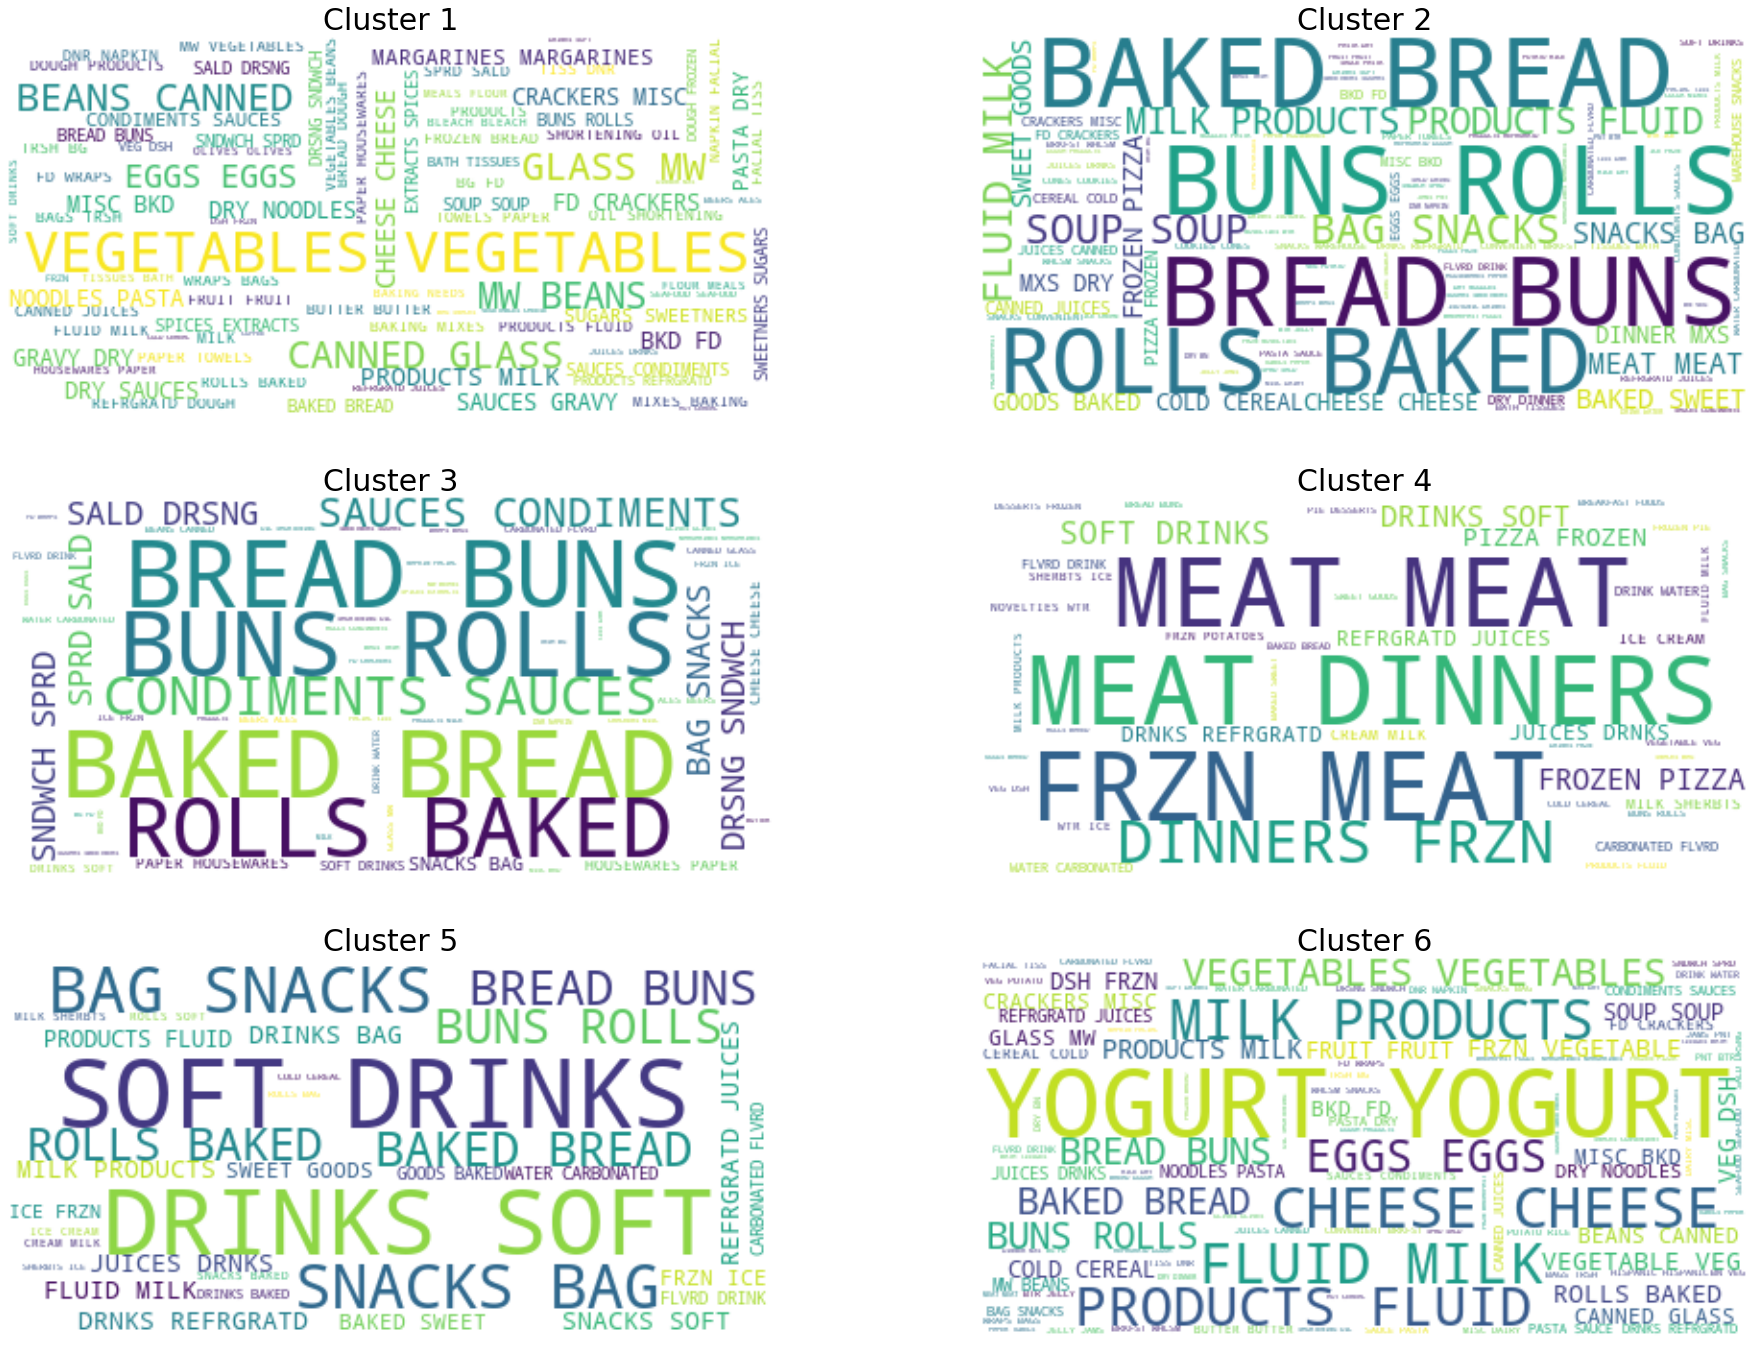

In [43]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

total_quantities = train_grocery_df['QUANTITY'].sum()

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(32, 24))
axes = axes.ravel()
for i, ax in enumerate(axes):
    high_lift_items_df = get_high_lift_frequent_items(k=i)
    high_lift_items_df['count'] = (high_lift_items_df['Total purchase prob'] * total_quantities).astype(np.int)
    weights = (high_lift_items_df['Lift'] * high_lift_items_df['count']).astype(np.int)
    high_lift_items_df['repeat_weight'] = (((weights - weights.min()) / (weights.max() - weights.min())) * 100).astype(np.int)
    high_lift_items_df['COMMODITY_DESC'] = (high_lift_items_df['COMMODITY_DESC'] + ', ').str.replace('SHELF', '').str.replace('STABLE', '')
    description = high_lift_items_df['COMMODITY_DESC'].repeat(high_lift_items_df['repeat_weight']).str.cat(sep=', ')
    img = wordcloud.generate(description)
    ax.imshow(img, interpolation="bilinear")
    ax.axis("off")
    ax.set_title('Cluster %i' % (i+1), size=30)

### Now product associations

In [84]:
cluster_1_df.sort_values('Lift', ascending=False)

,Total purchase prob,Lift,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,count,repeat_weight
PRODUCT_ID,,,,,,,,,,
820361,0.000201,64.838742,1557,GROCERY,National,BEANS - CANNED GLASS & MW,VARIETY BEANS - KIDNEY PINTO,15.5 OZ,348,18
1078011,0.000136,64.362460,499,GROCERY,National,VEGETABLES - SHELF STABLE,TOMATOES: STEWED/DICED/CRMD,14.5 OZ,235,12
839243,0.000140,62.249495,942,GROCERY,National,VEGETABLES - SHELF STABLE,MISCELLANEOUS VEGETABLES,6 OZ,242,12
897907,0.000114,59.474173,69,GROCERY,Private,BEANS - CANNED GLASS & MW,VARIETY BEANS - KIDNEY PINTO,15.5 OZ,197,9
965719,0.000286,58.837426,69,GROCERY,Private,VEGETABLES - SHELF STABLE,TOMATO SAUCE,29 OZ,495,24
...,...,...,...,...,...,...,...,...,...,...
12256522,0.000104,10.035651,1266,GROCERY,National,BAKING MIXES,LAYER CAKE MIX,18.25 OZ,180,0
1046689,0.000160,10.018668,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BISCUITS REGULAR,30 OZ,276,0
954006,0.000136,10.017317,499,GROCERY,National,PASTA SAUCE,VALUE,26 OZ,235,0


In [92]:
import itertools

cluster1_highest_lift_product_ids = cluster_1_df.sort_values('Lift', ascending=False).index[:5]
cluster1_highest_lift_product_pairs = list(itertools.combinations(cluster1_highest_lift_product_ids, 2))
len(cluster1_highest_lift_product_pairs)

10

In [93]:
from tqdm import tqdm
from collections import defaultdict

nb_baskets = len(train_grocery_df['BASKET_ID'].unique())
total_cluster_weight = sum([cluster_weights_by_basket_id[basket_id][0] for basket_id in train_grocery_df['BASKET_ID'].unique()])

basket_ids_with_pair_by_pair = defaultdict(list)
for i, g in tqdm(train_grocery_df.groupby('BASKET_ID')):
    for pair in cluster1_highest_lift_product_pairs:
        if ((g['PRODUCT_ID'] == pair[0]).sum() > 0) and ((g['PRODUCT_ID'] == pair[1]).sum() > 0):
            basket_ids_with_pair_by_pair[pair].append(g['BASKET_ID'].iloc[0])

pair_lifts = {}
for pair, basket_ids in basket_ids_with_pair_by_pair.items():
    total_proba = len(basket_ids) / nb_baskets
    cluster_pair_proba = sum([cluster_weights_by_basket_id[basket_id][0] for basket_id in basket_ids]) / total_cluster_weight
    pair_lifts[pair] = cluster_pair_proba / total_proba    

100%|██████████| 172328/172328 [04:12<00:00, 681.97it/s]


In [94]:
pair_lifts

{(839243, 965719): 5.666362108004286,
 (1078011, 965719): 9.312282934869602,
 (820361, 965719): 17.20124521486411,
 (820361, 839243): 12.791377971885272,
 (820361, 897907): 14.062228613664635,
 (897907, 965719): 2.998281589439453,
 (820361, 1078011): 5.240117676008963e-07}

In [96]:
products_df[(products_df.index == 820361) | (products_df.index == 965719)]

,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
PRODUCT_ID,,,,,,
820361,1557,GROCERY,National,BEANS - CANNED GLASS & MW,VARIETY BEANS - KIDNEY PINTO,15.5 OZ
965719,69,GROCERY,Private,VEGETABLES - SHELF STABLE,TOMATO SAUCE,29 OZ


In [45]:
total_pair_proba = len(baskets_with_product_pair['BASKET_ID'].unique()) / len(train_grocery_df['BASKET_ID'].unique())
total_pair_proba

0.0010677313030964207

In [57]:
cluster_pair_weight = 0
for i, g in baskets_with_product_pair.groupby('BASKET_ID'):
    basket_id = g['BASKET_ID'].iloc[0]
    cluster_pair_weight += cluster_weights_by_basket_id[basket_id][0]
    
total_weight = 0
for i, g in train_grocery_df.groupby('BASKET_ID'):
    basket_id = g['BASKET_ID'].iloc[0]
    total_weight += cluster_weights_by_basket_id[basket_id][0]

cluster_pair_proba = cluster_pair_weight / total_weight
cluster_pair_proba

0.0045542418507614375

In [58]:
pair_lift = cluster_pair_proba / total_pair_proba
pair_lift

4.265344509010962

In [131]:
total_cluster_weights = best_gamma.sum(axis=0)

products_filepath = '/home/adrien/Téléchargements/dunnhumby/product.csv'
products_df = pd.read_csv(products_filepath)
products_df.set_index('PRODUCT_ID', inplace=True)

def product_prob_for_component(g, k):
    total_product_cluster_weight = 0
    for basket_id in g['BASKET_ID']:
        total_product_cluster_weight += cluster_weights_by_basket_id[basket_id][k]
    return total_product_cluster_weight / total_cluster_weights[k]

def get_high_lift_frequent_items(k):
    product_cluster_purchase_prob = train_grocery_df.groupby('PRODUCT_ID').apply(lambda g: product_prob_for_component(g, k))
    lift = product_cluster_purchase_prob / product_purchase_prob
    lift_df = pd.DataFrame(data={'Lift': lift})
    high_lift_df = lift_df[lift_df.Lift > 10]
    high_freq_and_high_lift = high_freq_items_prob_df.join(high_lift_df, how='inner').sort_values('Lift', ascending=False)
    return high_freq_and_high_lift.join(products_df, how='inner')

0.00033696091311205653

### Predictive profiles

__Global predictive profile__

<AxesSubplot:>

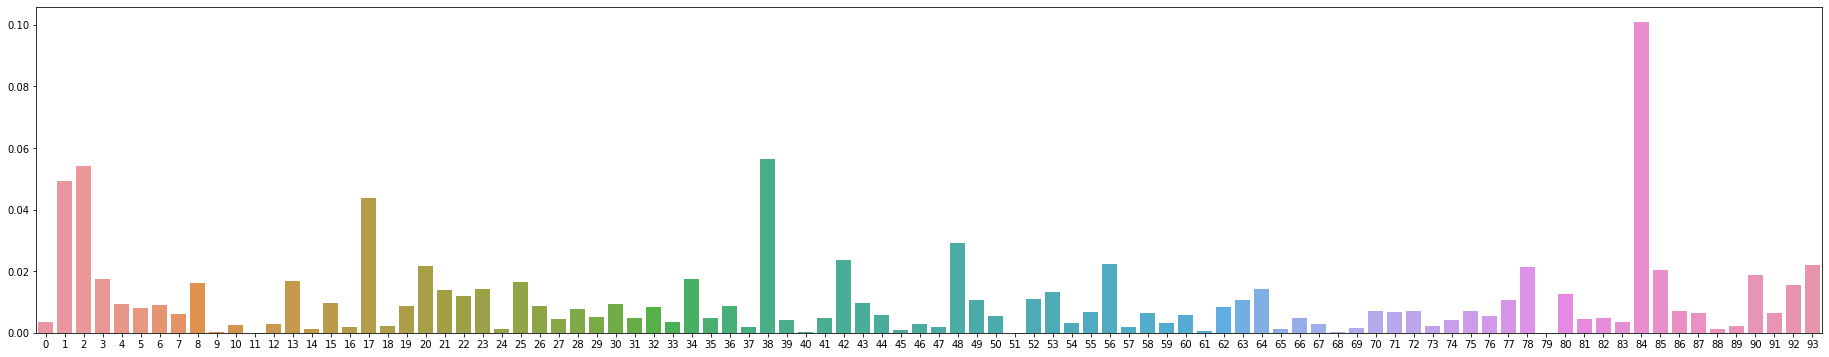

In [18]:
weighted_multi = best_alpha.reshape(-1, 1) * best_beta
global_predictive_profile = weighted_multi.sum(axis=0) / weighted_multi.sum()

plt.subplots(figsize=(32,6))
sns.barplot(x=np.arange(best_beta.shape[1]), y=global_predictive_profile)

__same thing by sampling__

Text(0, 0.5, 'Purchase probability')

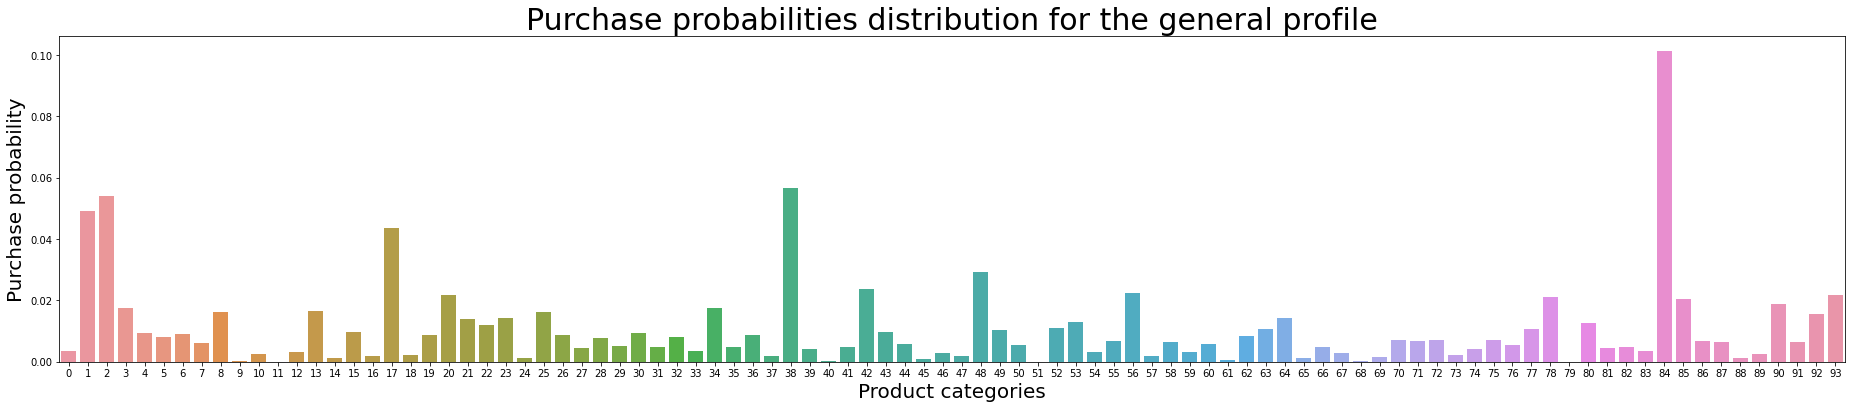

In [107]:
from scipy.stats import multinomial

K, C = best_beta.shape
n=100000
total = np.zeros((C))
for k in range(K):
    k_samples = best_alpha[k] * multinomial.rvs(n=100, p=best_beta[k], size=1000)
    total += k_samples.sum(axis=0)
probs = total / total.sum()

plt.subplots(figsize=(32,6))
ax = sns.barplot(x=np.arange(probs.size), y=probs)
ax.set_title('Purchase probabilities distribution for the general profile', size=30)
ax.set_xlabel('Product categories', size=20)
ax.set_ylabel('Purchase probability', size=20)

__Now using cluster assignments__

In [19]:
best_gamma_df = pd.DataFrame(best_gamma, index=train_household_ids)
best_gamma_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
household_key,,,,,,,,,,,,,,,,,,,,,
1,0.000003,1.475175e-07,0.000253,0.036089,0.000004,0.000036,0.122131,0.009325,0.005949,1.207729e-07,...,0.000058,0.692854,0.000163,0.000061,0.000070,1.088906e-12,0.086876,2.464582e-09,0.002886,7.526370e-10
1,0.000826,3.291761e-04,0.001077,0.000294,0.012462,0.030205,0.000167,0.000626,0.000209,7.525238e-03,...,0.000749,0.000490,0.000756,0.007195,0.001130,5.439155e-02,0.002712,3.790589e-02,0.000466,2.193292e-01
1,0.002840,8.820023e-04,0.000346,0.001863,0.017734,0.150113,0.000599,0.000721,0.000666,8.042490e-03,...,0.000455,0.001078,0.001056,0.002312,0.008436,1.837831e-03,0.036252,2.322108e-02,0.000740,6.516866e-01
1,0.474261,5.606458e-05,0.000011,0.248445,0.000044,0.000024,0.016675,0.008486,0.000597,2.056555e-07,...,0.000073,0.088971,0.000017,0.000478,0.097567,1.497910e-09,0.011381,3.280153e-06,0.000171,4.089129e-05
1,0.000048,6.839182e-06,0.000016,0.000013,0.000682,0.003109,0.000003,0.001019,0.000004,5.287667e-04,...,0.000020,0.000081,0.000046,0.000294,0.000090,7.122738e-05,0.000117,1.860443e-02,0.000033,2.945520e-02


In [22]:
test_counts_df.index = test_counts_df.index.droplevel()

In [139]:
from scipy.special import logsumexp

def compute_complete_predictive_profile(household_key):
    household_assignments = best_gamma_df[best_gamma_df.index == household_key]

    K, C = best_beta.shape
    total = np.zeros(C)
    for i, assignment in household_assignments.iterrows():
        for k in range(assignment.size):
            i_k_samples = assignment[k] * best_alpha[k] * multinomial.rvs(n=100, p=best_beta[k], size=100)
            total += i_k_samples.sum(axis=0)
    probs = total / total.sum()
    return probs
    
def compute_household_test_purchase(household_key):
    test_basket_ids=test_grocery_df.loc[test_grocery_df['household_key'] == household_key, 'BASKET_ID'].unique()
    household_test_counts_df = test_counts_df[test_counts_df.index.isin(test_basket_ids)].sum(axis=0)
    return household_test_counts_df / household_test_counts_df.sum()
    
def plot_prediction_vs_reality(household_key):
    fig, axes = plt.subplots(nrows=2, figsize=(32,14))
    axes = axes.ravel()
    
    predictive_probs = compute_complete_predictive_profile(household_key)
    sns.barplot(x=np.arange(predictive_probs.size), y=predictive_probs, ax=axes[0])
    axes[0].set_title('Purchases probabilities prediction for household %s' % str(household_key), size=20)
    axes[0].set_xlabel('Categories', size=20)
    axes[0].set_ylabel('Probability', size=20)

    test_probs = compute_household_test_purchase(household_key)
    sns.barplot(x=np.arange(test_probs.size), y=test_probs, ax=axes[1])
    axes[1].set_title('Purchases from the test set for household %s' % str(household_key), size=20)
    axes[1].set_xlabel('Categories', size=20)
    axes[1].set_ylabel('Probability', size=20)

    l1_distance = np.abs(predictive_probs - test_probs).sum()
    plt.text(0.5, -0.25, 'L1 distance between prediction and test data: %.3f' % l1_distance,
             horizontalalignment='center', verticalalignment='center', transform = axes[1].transAxes, size=30)

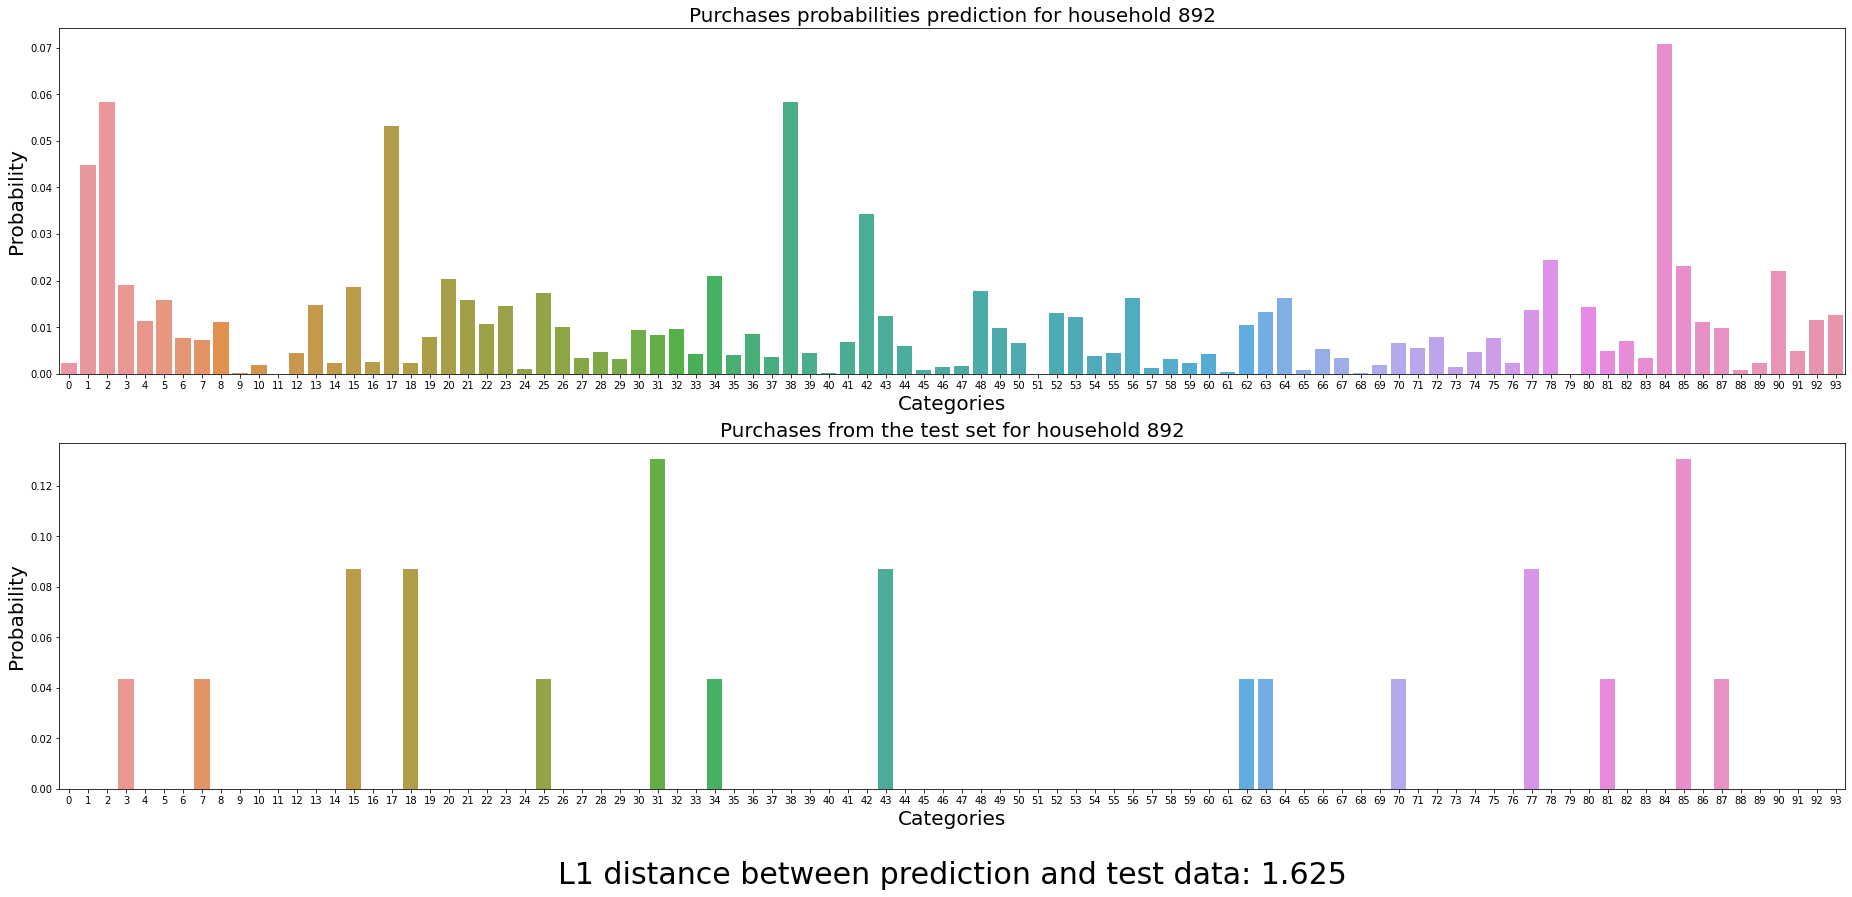

In [140]:
plot_prediction_vs_reality(892)

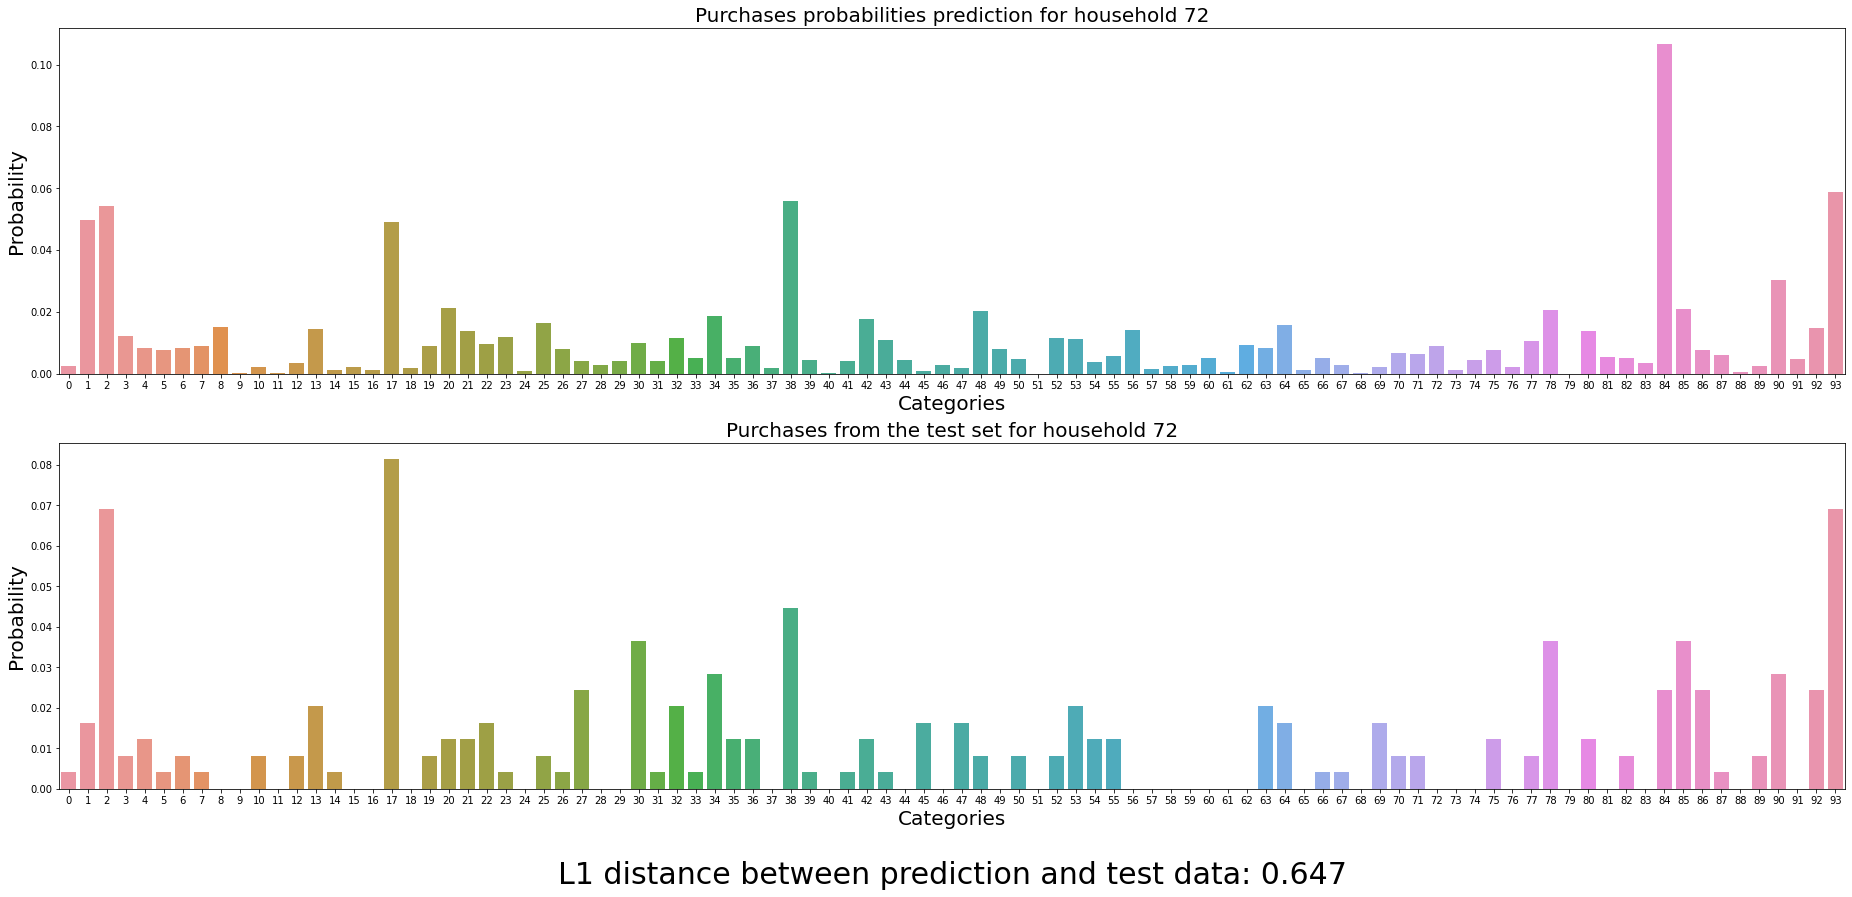

In [141]:
plot_prediction_vs_reality(72)

In [137]:
from tqdm import tqdm

unique_test_household_ids = test_grocery_df['household_key'].unique()
predictions_distances = {}
for household_id in tqdm(unique_test_household_ids):
    predictive_probs = compute_complete_predictive_profile(household_id)
    test_probs = compute_household_test_purchase(household_id)
    l1_distance = np.abs(predictive_probs - test_probs).sum()
    predictions_distances[household_id] = l1_distance

 86%|████████▋ | 2038/2361 [41:14<03:28,  1.55it/s]  <ipython-input-134-6d4f598e4f8d>:12: RuntimeWarning: invalid value encountered in true_divide
  probs = total / total.sum()
 90%|████████▉ | 2117/2361 [41:56<01:21,  2.99it/s]<ipython-input-134-6d4f598e4f8d>:12: RuntimeWarning: invalid value encountered in true_divide
  probs = total / total.sum()
 98%|█████████▊| 2302/2361 [43:15<00:16,  3.64it/s]<ipython-input-134-6d4f598e4f8d>:12: RuntimeWarning: invalid value encountered in true_divide
  probs = total / total.sum()
100%|██████████| 2361/2361 [43:35<00:00,  1.11s/it]


In [138]:
pickle.dump(predictions_distances, open('predictions_distances.p', 'wb'))

### Check individuals cluster assignments stability

In [147]:
def plot_group_clusters_attributions(household_key):
    g = best_gamma_df.groupby(best_gamma_df.index).get_group(household_key).copy()
    n, c = g.shape
    fig, axes = plt.subplots(nrows=((n+1) // 2), ncols=2, figsize=(32,64))
    for i in range(n):
        sns.barplot(x=list(range(g.shape[1])), y=g.iloc[i], ax=axes[(i//2)][i%2])
        axes[(i//2)][i%2].set_title('Visit = %i' % (i+1), size=16)

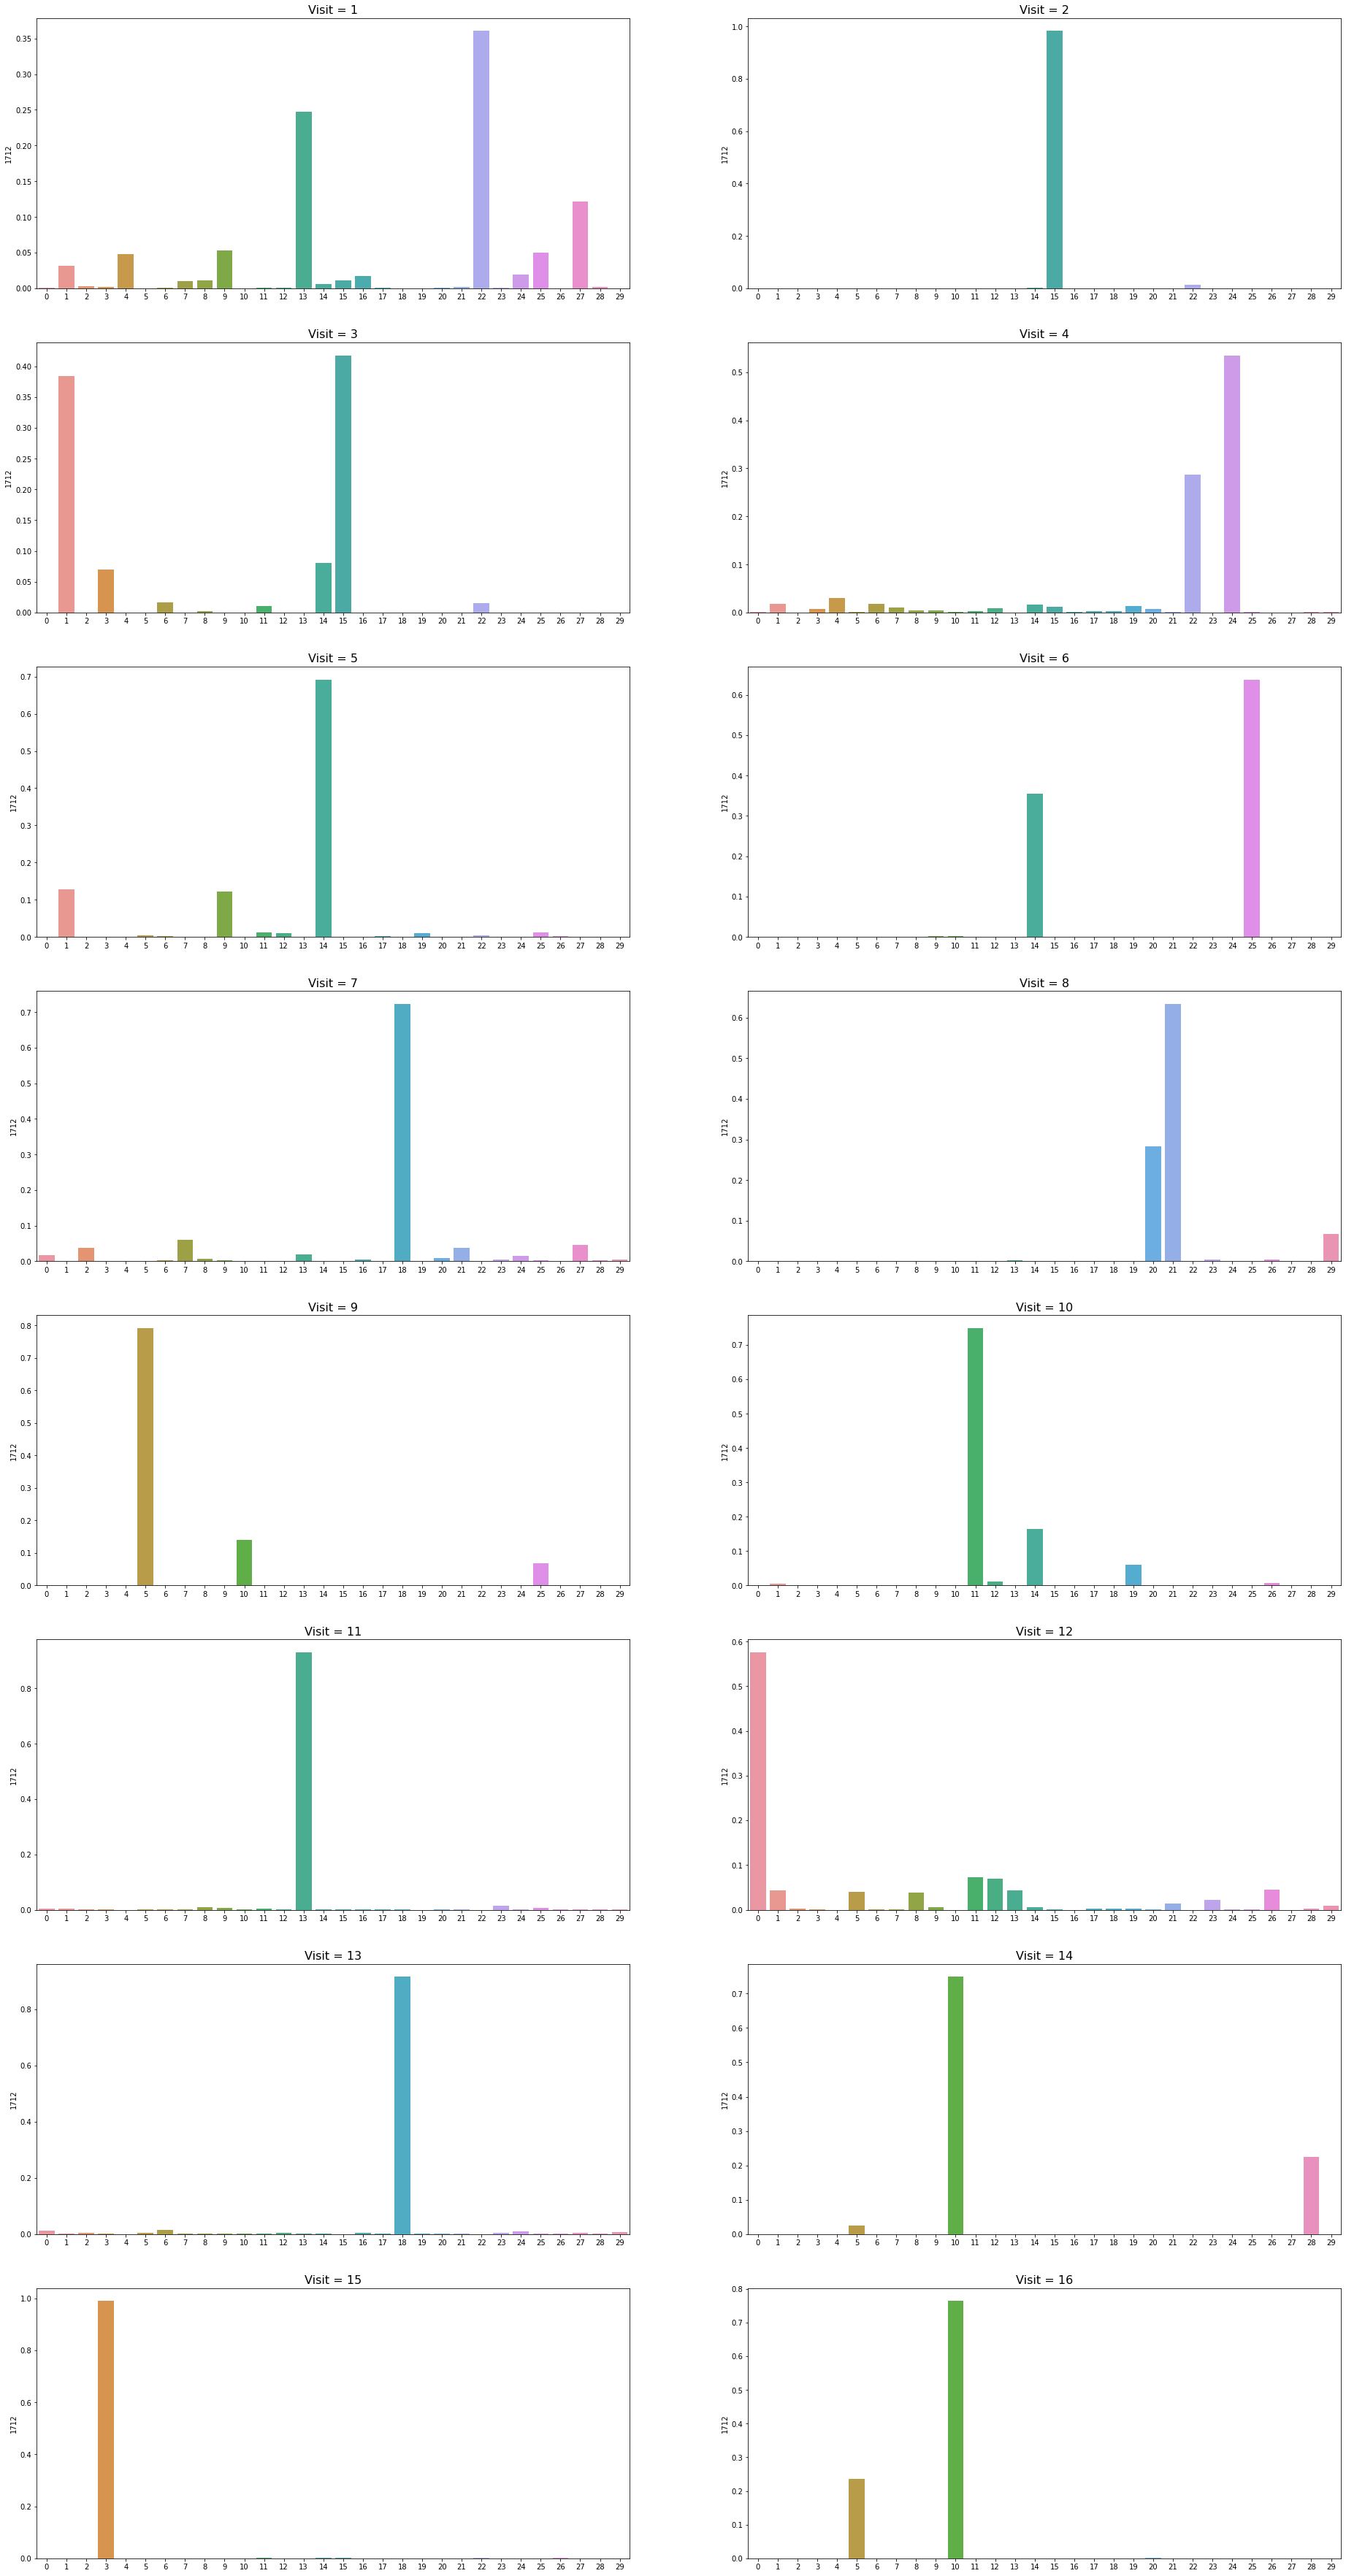

In [148]:
plot_group_clusters_attributions(1712)

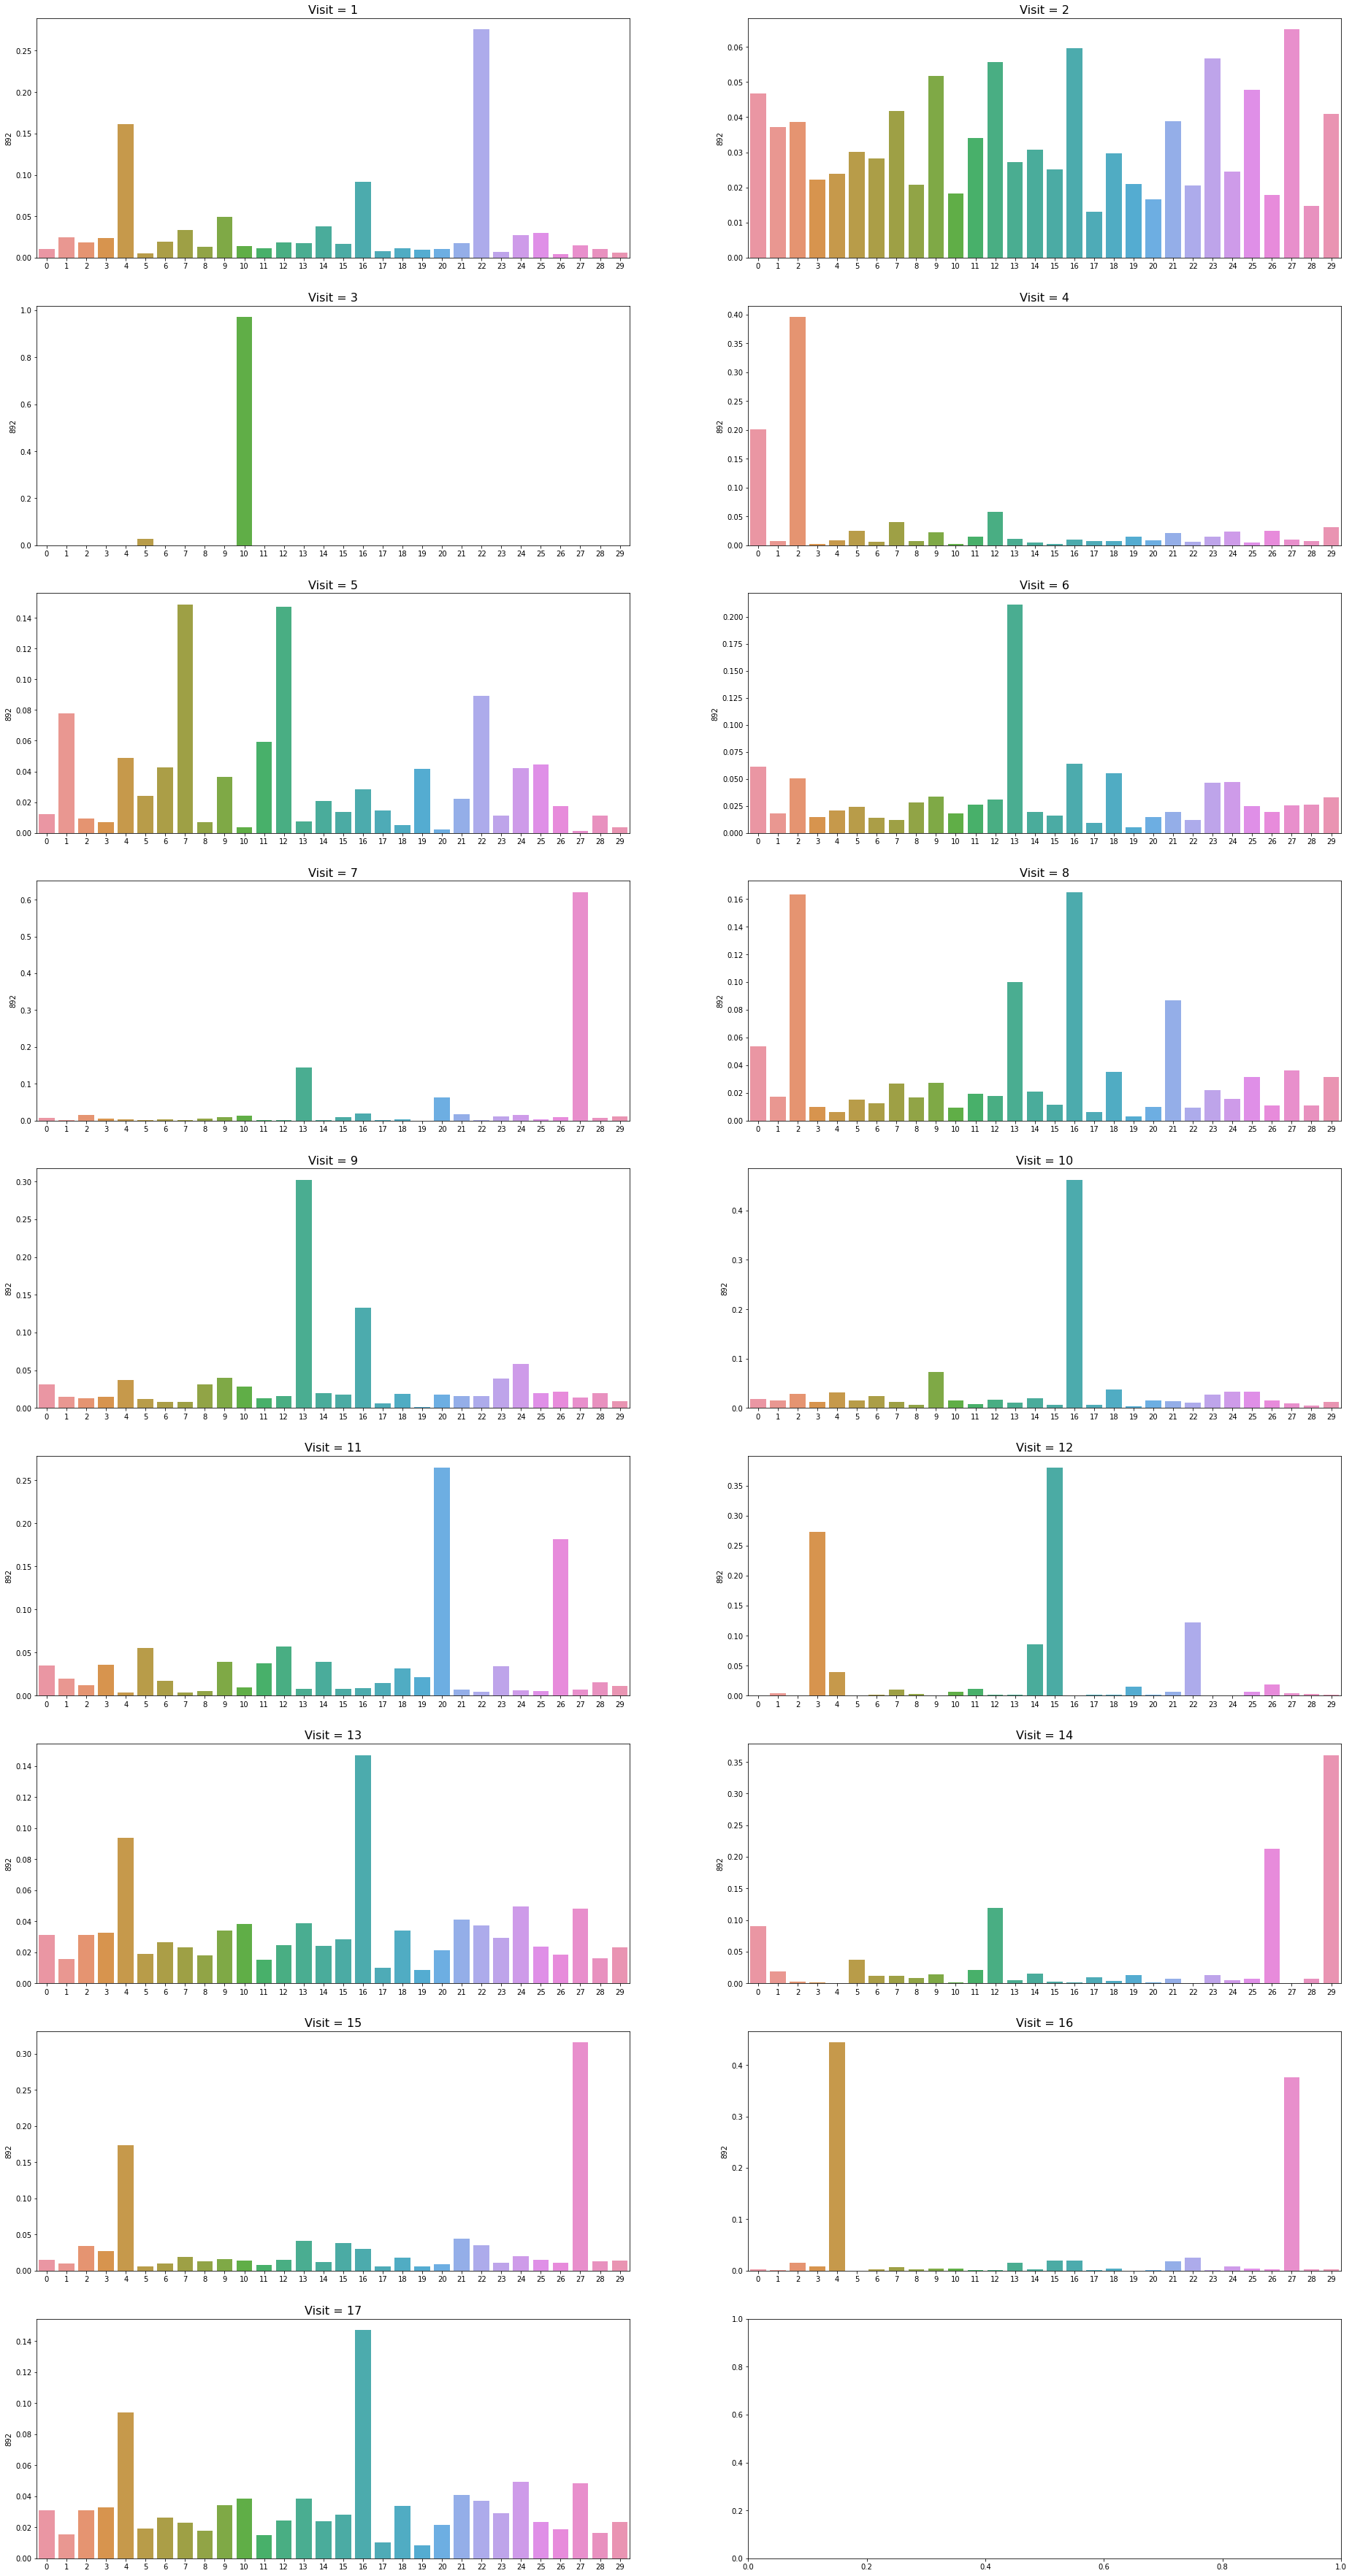

In [149]:
plot_group_clusters_attributions(892)